/var/folders/pv/fxpx77nd7c59d2tlpszk0zf00000gq/T/ipykernel_92822/2971188027.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), ax=ax2, palette='viridis')


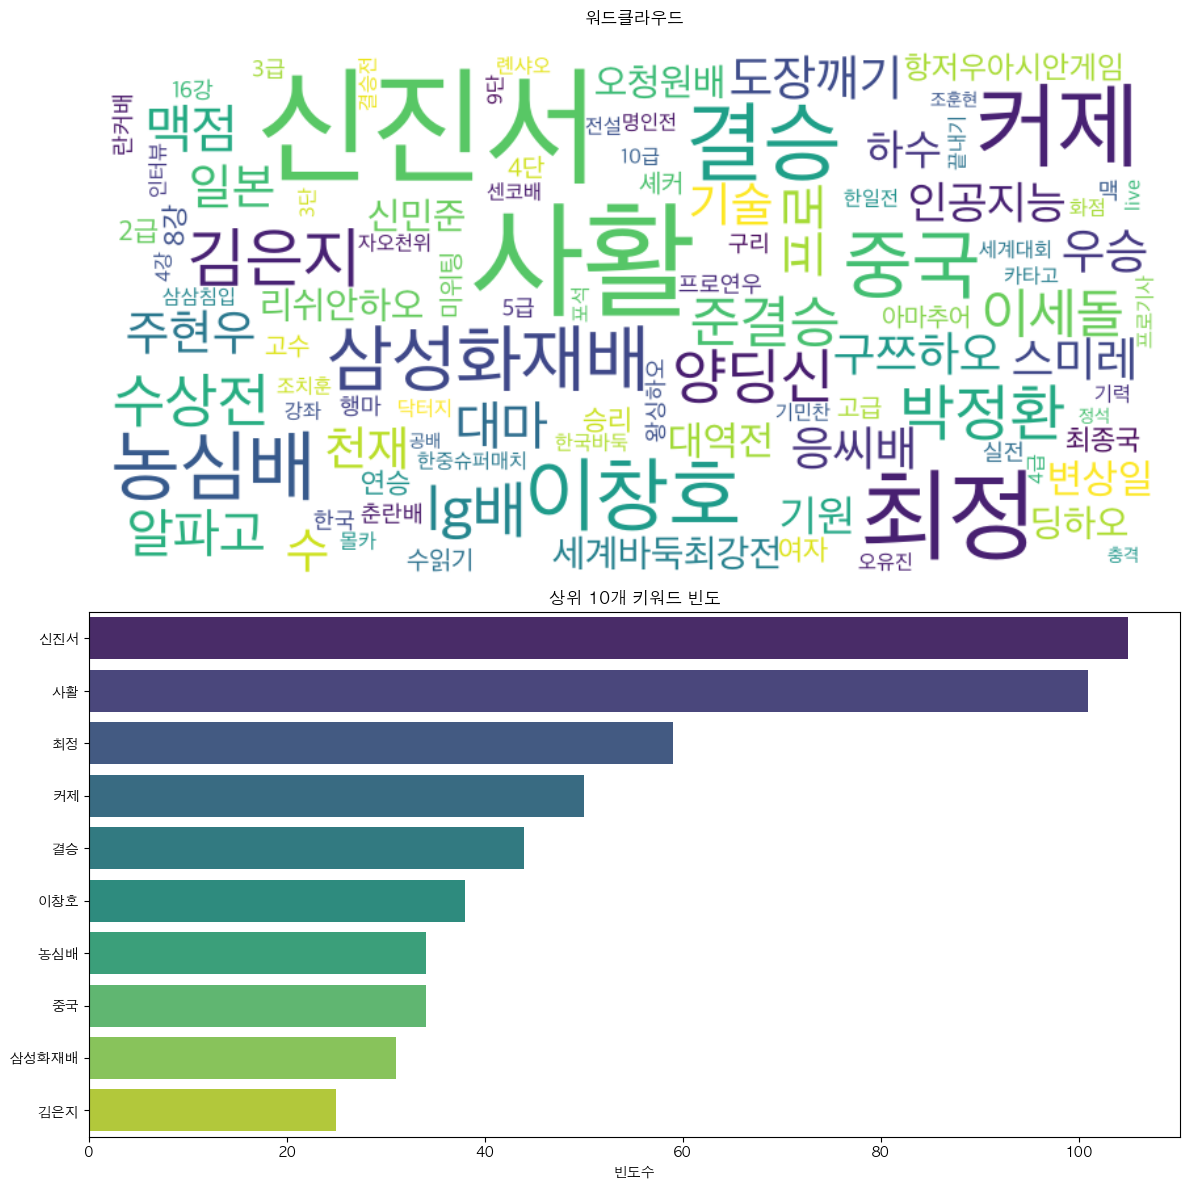

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

# 엑셀 파일 읽기
df = pd.read_excel('words.xlsx', header=None)

# 불용어 설정
stop_words = {'바둑', '문제', '묘수', '흑', '백'}

# 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 여러 공백을 하나로
    text = ' '.join(text.split())
    return text

# 데이터 전처리 및 불용어 제거
keywords = df[0].astype(str).apply(preprocess_text).str.cat(sep=' ')
words = [word for word in keywords.split() if word not in stop_words]
word_counts = Counter(words)

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    max_font_size=100,
    stopwords=stop_words,
    random_state=42
).generate_from_frequencies(word_counts)

# 상위 10개 단어 추출
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 워드클라우드 시각화
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('워드클라우드', pad=20)

# 막대 그래프 생성
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), ax=ax2, palette='viridis')
ax2.set_title('상위 10개 키워드 빈도')
ax2.set_xlabel('빈도수')

plt.tight_layout()
plt.show()

Pearson 상관계수: -0.14522311786109093
Spearman 상관계수: 0.053205279218020034
R-squared: 0.021929417820462805
p-value: 0.0008958566049641913


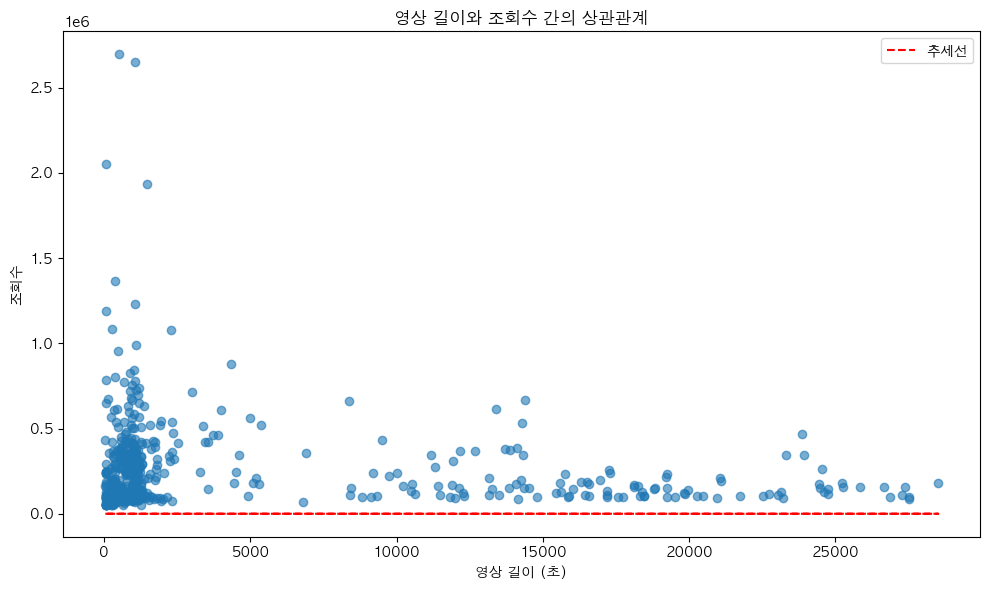

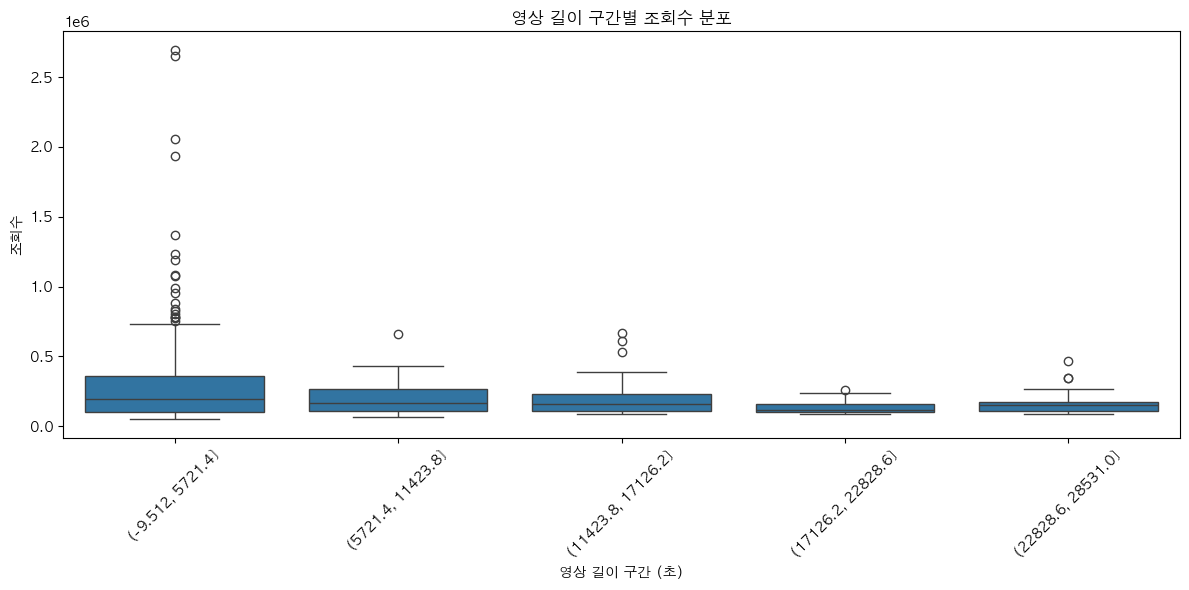

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
plt.rcParams['font.family'] = 'AppleGothic'

# 데이터 불러오기
df = pd.read_excel('youtube_data.xlsx')

# Time을 초 단위로 변환
def time_to_seconds(time_obj):
    time_str = time_obj.strftime('%H:%M:%S')
    parts = time_str.split(':')
    if len(parts) == 3:  # HH:MM:SS 형식
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s
    elif len(parts) == 2:  # MM:SS 형식
        m, s = map(int, parts)
        return m * 60 + s
    else:  # SS 형식
        return int(parts[0])

# Time 컬럼을 Duration_Seconds로 변환
df['Duration_Seconds'] = df['Time'].apply(time_to_seconds)

# 상관관계 분석
correlation_pearson = df['Duration_Seconds'].corr(df['Popularity Score'], method='pearson')
correlation_spearman = df['Duration_Seconds'].corr(df['Popularity Score'], method='spearman')

print("Pearson 상관계수:", correlation_pearson)
print("Spearman 상관계수:", correlation_spearman)

# 산점도 그래프
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration_Seconds'], df['Views'], alpha=0.6)
plt.title('영상 길이와 조회수 간의 상관관계')
plt.xlabel('영상 길이 (초)')
plt.ylabel('조회수')

# 추세선 추가
z = np.polyfit(df['Duration_Seconds'], df['Popularity Score'], 1)
p = np.poly1d(z)
plt.plot(df['Duration_Seconds'], p(df['Duration_Seconds']), "r--", label='추세선')
plt.legend()

# 통계적 유의성 검정
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Duration_Seconds'], df['Views'])
print(f"R-squared: {r_value**2}")
print(f"p-value: {p_value}")

plt.tight_layout()
plt.show()

# 박스 플롯으로 길이에 따른 조회수 분포 시각화
plt.figure(figsize=(12, 6))
df['Duration_Category'] = pd.cut(df['Duration_Seconds'], bins=5)
sns.boxplot(x='Duration_Category', y='Views', data=df)
plt.title('영상 길이 구간별 조회수 분포')
plt.xlabel('영상 길이 구간 (초)')
plt.ylabel('조회수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

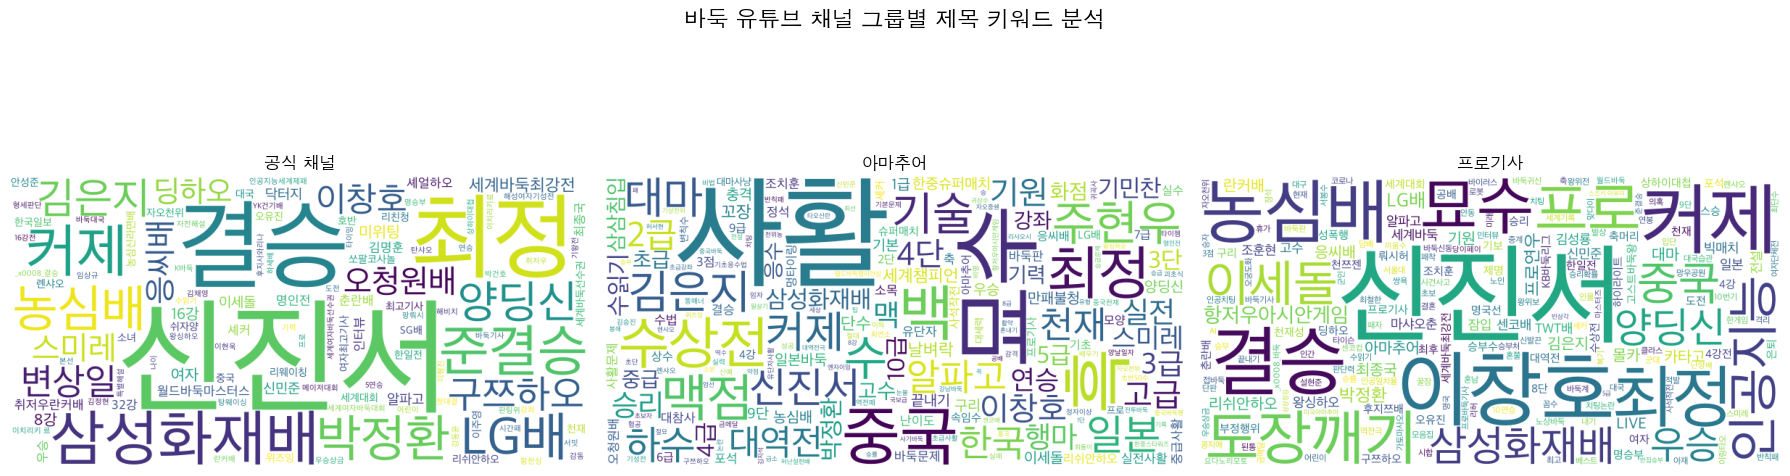

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# 제외할 키워드 정의
EXCLUDE_KEYWORDS = {'바둑', '문제'}

def clean_keyword(keyword):
    # 문자열이 아닌 경우 빈 문자열 반환
    if not isinstance(keyword, str):
        return ''
    # 앞뒤 공백 제거
    keyword = keyword.strip()
    # 특수문자 제거 (단, 한글, 영문, 숫자만 유지)
    keyword = re.sub(r'[^\w\s가-힣]', '', keyword)
    # 제외 키워드 체크
    if keyword in EXCLUDE_KEYWORDS:
        return ''
    return keyword

# 데이터 로드
df = pd.read_excel('youtube_data.xlsx')

# 그룹별 제목 매핑
group_titles = {
    1: '공식 채널',
    2: '아마추어',
    3: '프로기사'
}

# 서브플롯 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('바둑 유튜브 채널 그룹별 제목 키워드 분석', fontsize=16)

# 그룹별 워드클라우드 생성
for group_num, ax in zip([1, 2, 3], axes):
    # 해당 그룹의 키워드 추출
    group_keywords = df[df['Group code'] == group_num]['Title Keyword']
    
    # 키워드 결합 및 빈도수 계산 (정제 과정 추가)
    all_keywords = []
    for keywords in group_keywords:
        if isinstance(keywords, str):
            # 쉼표로 분리하고 각 키워드 정제
            cleaned_keywords = [clean_keyword(k) for k in keywords.split(',')]
            # 빈 문자열과 제외된 키워드 필터링
            cleaned_keywords = [k for k in cleaned_keywords if k]
            all_keywords.extend(cleaned_keywords)
    
    keyword_count = Counter(all_keywords)
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(keyword_count)
    
    # 서브플롯에 워드클라우드 표시
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(f'{group_titles[group_num]}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/var/folders/pv/fxpx77nd7c59d2tlpszk0zf00000gq/T/ipykernel_53045/1976274730.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/pv/fxpx77nd7c59d2tlpszk0zf00000gq/T/ipykernel_53045/1976274730.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='mean', y=avg_popularity.index,
/var/folders/pv/fxpx77nd7c59d2tlpszk0zf00000gq/T/ipykernel_53045/1976274730.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/mac/Desktop/Baduk-analysis/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


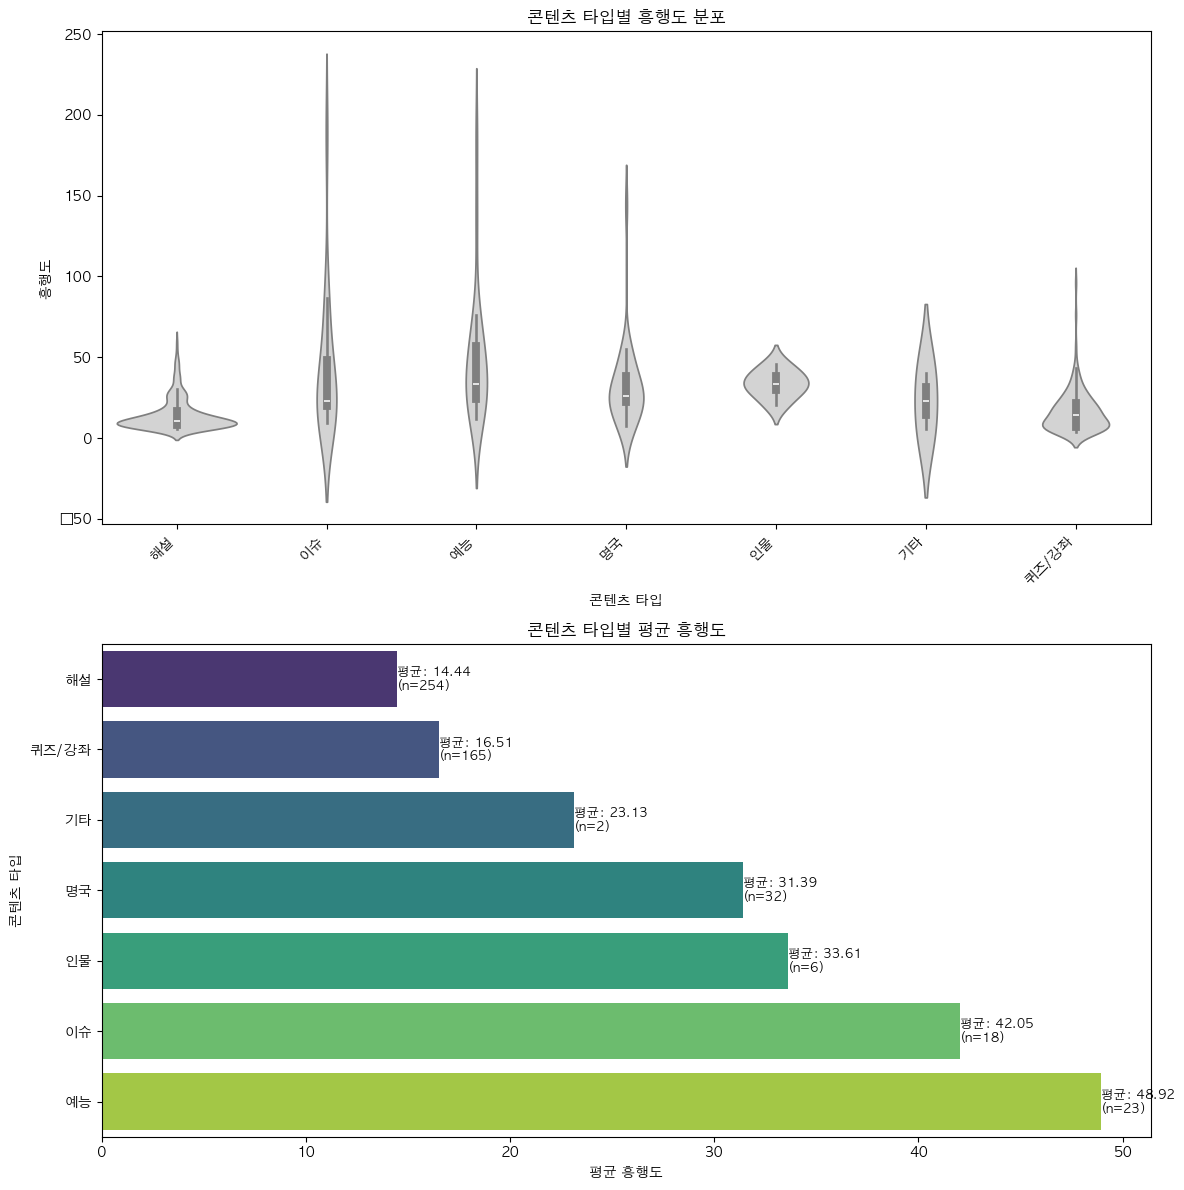


=== 콘텐츠 타입별 통계 ===
               mean  count
Content Type              
예능            48.92     23
이슈            42.05     18
인물            33.61      6
명국            31.39     32
기타            23.13      2
퀴즈/강좌         16.51    165
해설            14.44    254


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 설정 (2행 1열)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 1. 박스플롯 + 바이올린 플롯
sns.violinplot(data=df, x='Content Type', y='Popularity Score', 
               ax=ax1, inner='box', color='lightgray')
ax1.set_title('콘텐츠 타입별 흥행도 분포')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_xlabel('콘텐츠 타입')
ax1.set_ylabel('흥행도')

# 2. 평균 흥행도 바차트
avg_popularity = df.groupby('Content Type')['Popularity Score'].agg(['mean', 'count']).round(2)
avg_popularity = avg_popularity.sort_values('mean', ascending=True)

bars = sns.barplot(x='mean', y=avg_popularity.index, 
                  data=avg_popularity, ax=ax2, 
                  palette='viridis')

# 바 위에 평균값과 영상 수 표시
for i, (mean, count) in enumerate(zip(avg_popularity['mean'], avg_popularity['count'])):
    bars.text(mean, i, f'평균: {mean:.2f}\n(n={count})', 
             va='center', fontsize=9)

ax2.set_title('콘텐츠 타입별 평균 흥행도')
ax2.set_xlabel('평균 흥행도')
ax2.set_ylabel('콘텐츠 타입')

plt.tight_layout()
plt.show()

# 수치로도 확인
print("\n=== 콘텐츠 타입별 통계 ===")
print(avg_popularity.sort_values('mean', ascending=False))

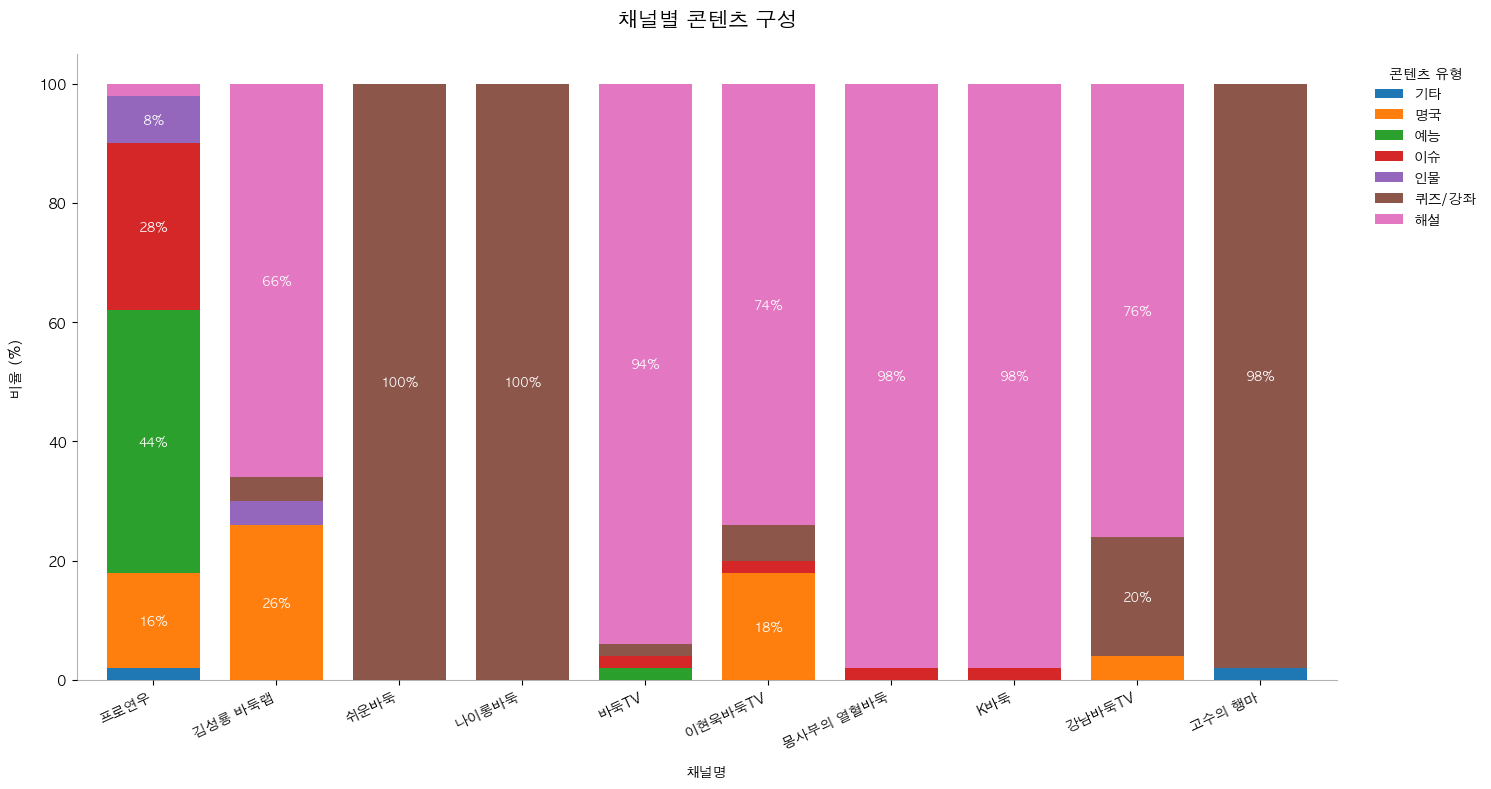


=== 채널별 콘텐츠 타입 비율(%) ===
Content Type   기타    명국    예능    이슈   인물  퀴즈/강좌    해설
Channel Name                                         
K바둑           0.0   0.0   0.0   2.0  0.0    0.0  98.0
강남바둑TV        0.0   4.0   0.0   0.0  0.0   20.0  76.0
고수의 행마        2.0   0.0   0.0   0.0  0.0   98.0   0.0
김성룡 바둑랩       0.0  26.0   0.0   0.0  4.0    4.0  66.0
나이롱바둑         0.0   0.0   0.0   0.0  0.0  100.0   0.0
몽사부의 열혈바둑     0.0   0.0   0.0   2.0  0.0    0.0  98.0
바둑TV          0.0   0.0   2.0   2.0  0.0    2.0  94.0
쉬운바둑          0.0   0.0   0.0   0.0  0.0  100.0   0.0
이현욱바둑TV       0.0  18.0   0.0   2.0  0.0    6.0  74.0
프로연우          2.0  16.0  44.0  28.0  8.0    0.0   2.0


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 한글 폰트

# 채널 순서 정의
channel_order = [
    '프로연우',
    '김성룡 바둑랩',
    '쉬운바둑',
    '나이롱바둑',
    '바둑TV',
    '이현욱바둑TV',
    '몽사부의 열혈바둑',
    'K바둑',
    '강남바둑TV',
    '고수의 행마'
]

# 데이터 준비 및 재정렬
channel_content = pd.crosstab(df['Channel Name'], 
                             df['Content Type'], 
                             normalize='index') * 100
channel_content = channel_content.reindex(channel_order)

# 시각화
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
bars = channel_content.plot(kind='bar', 
                          stacked=True, 
                          width=0.75,
                          ax=ax)

# 스타일링
ax.set_title('채널별 콘텐츠 구성', fontsize=15, pad=20)
ax.set_xlabel('채널명', labelpad=10)
ax.set_ylabel('비율 (%)', labelpad=10)

# 축 레이블 회전 및 정렬
plt.xticks(rotation=25, ha='right')

# 그리드 및 테두리 제거
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

# 범례 스타일링
legend = plt.legend(title='콘텐츠 유형',
                   bbox_to_anchor=(1.02, 1),
                   loc='upper left',
                   frameon=False)

# 비율 표시 (8% 이상만)
for c in ax.containers:
    labels = [f'{v:.0f}%' if v >= 8 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, 
                 label_type='center',
                 color='white',
                 fontweight='bold',
                 fontsize=9)

plt.tight_layout()
plt.show()

# 수치 데이터 출력
print("\n=== 채널별 콘텐츠 타입 비율(%) ===")
print(channel_content.round(1).sort_index())

/var/folders/pv/fxpx77nd7c59d2tlpszk0zf00000gq/T/ipykernel_64934/2837283518.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='mean',


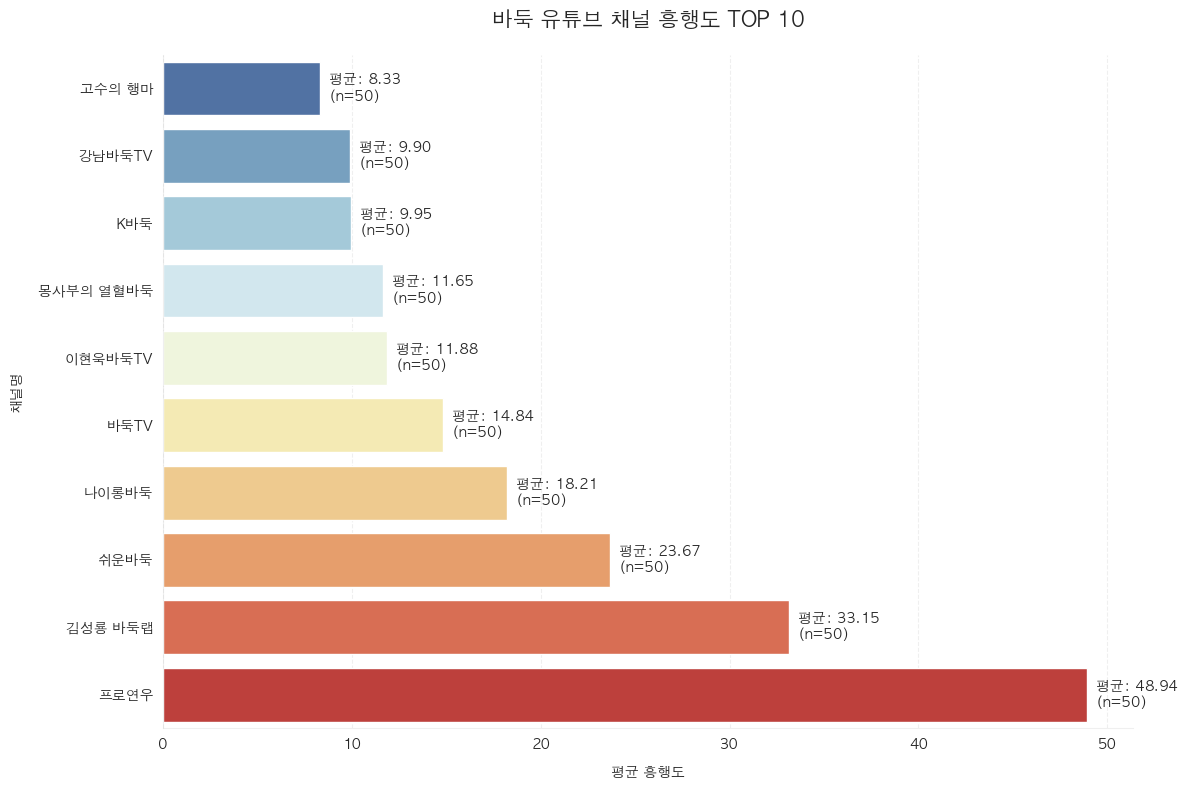


=== 채널별 흥행도 순위 ===
               mean  count
Channel Name              
프로연우          48.94     50
김성룡 바둑랩       33.15     50
쉬운바둑          23.67     50
나이롱바둑         18.21     50
바둑TV          14.84     50
이현욱바둑TV       11.88     50
몽사부의 열혈바둑     11.65     50
K바둑            9.95     50
강남바둑TV         9.90     50
고수의 행마         8.33     50


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 채널별 평균 흥행도 계산
channel_popularity = df.groupby('Channel Name')['Popularity Score'].agg(['mean', 'count']).round(2)
top_channels = channel_popularity.sort_values('mean', ascending=True).tail(10)

# 시각화
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

# 수평 막대 그래프
bars = sns.barplot(x='mean', 
                  y=top_channels.index,
                  data=top_channels,
                  palette='RdYlBu_r',
                  ax=ax)

# 스타일링
ax.set_title('바둑 유튜브 채널 흥행도 TOP 10', pad=20, fontsize=15)
ax.set_xlabel('평균 흥행도', labelpad=10)
ax.set_ylabel('채널명', labelpad=10)

# 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

# 그리드 스타일링
ax.grid(axis='x', linestyle='--', alpha=0.3)

# 값 표시
for i, v in enumerate(top_channels['mean']):
    ax.text(v, i, f'  평균: {v:.2f}\n  (n={int(top_channels["count"].iloc[i])})',
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 순위 데이터 출력
print("\n=== 채널별 흥행도 순위 ===")
print(top_channels.sort_values('mean', ascending=False))

/var/folders/pv/fxpx77nd7c59d2tlpszk0zf00000gq/T/ipykernel_83712/3963388544.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [pd.Grouper(freq='M'), 'Channel Name'])['Popularity Score'].mean().reset_index()


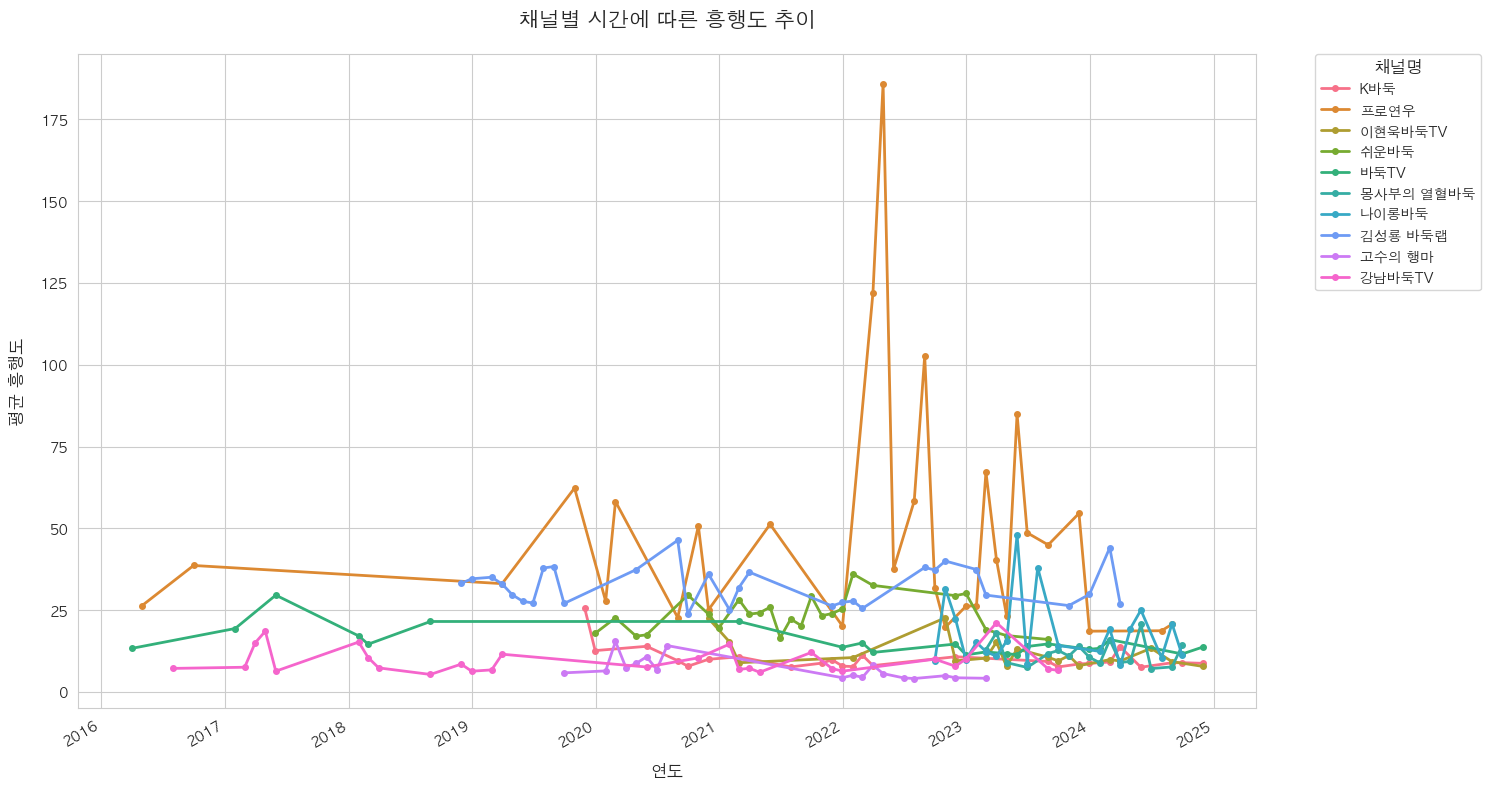


=== 채널별 전체 평균 흥행도 ===
Channel Name
프로연우         48.94
김성룡 바둑랩      33.15
쉬운바둑         23.67
나이롱바둑        18.21
바둑TV         14.84
이현욱바둑TV      11.88
몽사부의 열혈바둑    11.65
K바둑           9.95
강남바둑TV        9.90
고수의 행마        8.33
Name: Popularity Score, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 폰트 설정을 가장 먼저
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_excel('youtube_data.xlsx')
df['Published Date'] = pd.to_datetime(df['Published Date'])

# 월별 데이터 집계
monthly_trends = df.set_index('Published Date').groupby(
    [pd.Grouper(freq='M'), 'Channel Name'])['Popularity Score'].mean().reset_index()

# 시각화
plt.figure(figsize=(15, 8))

# 채널별 색상 매핑
colors = sns.color_palette('husl', n_colors=10)
channel_colors = dict(zip(df['Channel Name'].unique(), colors))

# 채널별 트렌드 라인
for channel in df['Channel Name'].unique():
    channel_data = monthly_trends[monthly_trends['Channel Name'] == channel]
    plt.plot(channel_data['Published Date'], 
             channel_data['Popularity Score'],
             label=channel,
             color=channel_colors[channel],
             marker='o',
             markersize=4,
             linewidth=2)

# 그래프 스타일링
plt.title('채널별 시간에 따른 흥행도 추이', fontsize=15, pad=20)
plt.xlabel('연도', fontsize=12, labelpad=10)
plt.ylabel('평균 흥행도', fontsize=12, labelpad=10)

# x축 포맷 설정
plt.gcf().autofmt_xdate()

# 범례 설정
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0.,
          title='채널명',
          fontsize=10,
          title_fontsize=12)

plt.tight_layout()
plt.show()

# 채널별 평균 흥행도 출력
print("\n=== 채널별 전체 평균 흥행도 ===")
print(df.groupby('Channel Name')['Popularity Score'].mean().sort_values(ascending=False).round(2))